In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer


In [2]:
df = pd.read_csv('/home/catpc/Downloads/12 concrete.csv')

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
df.shape

(1030, 9)

# Train test split

In [6]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1] #integer-location-based-index


x_train,x_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)



# Check Data Distribution (in project use this code for data distribution)

In [7]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

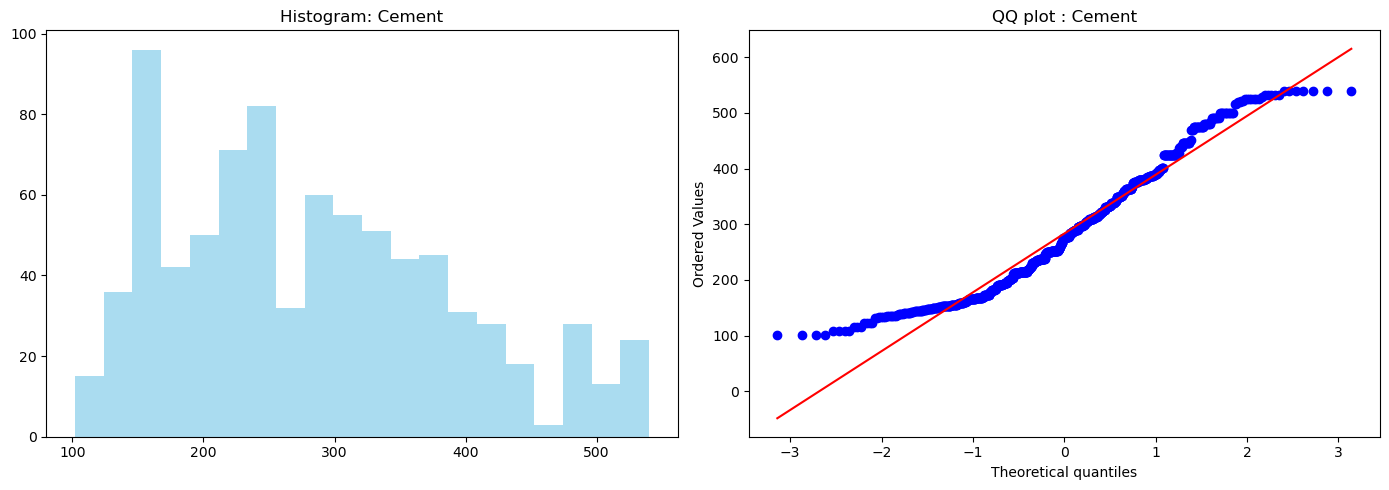

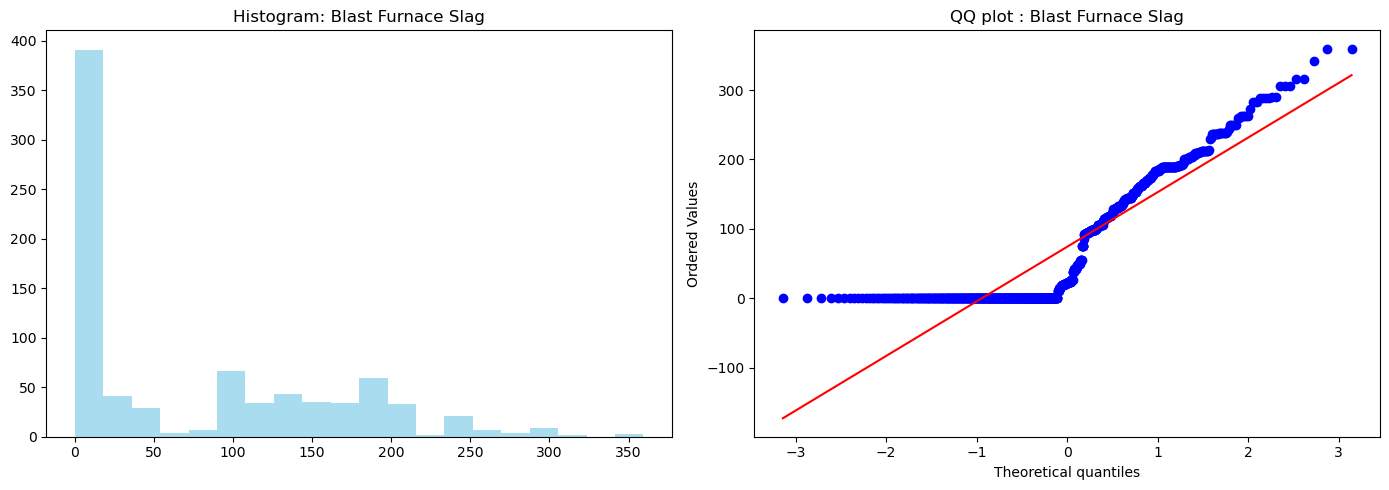

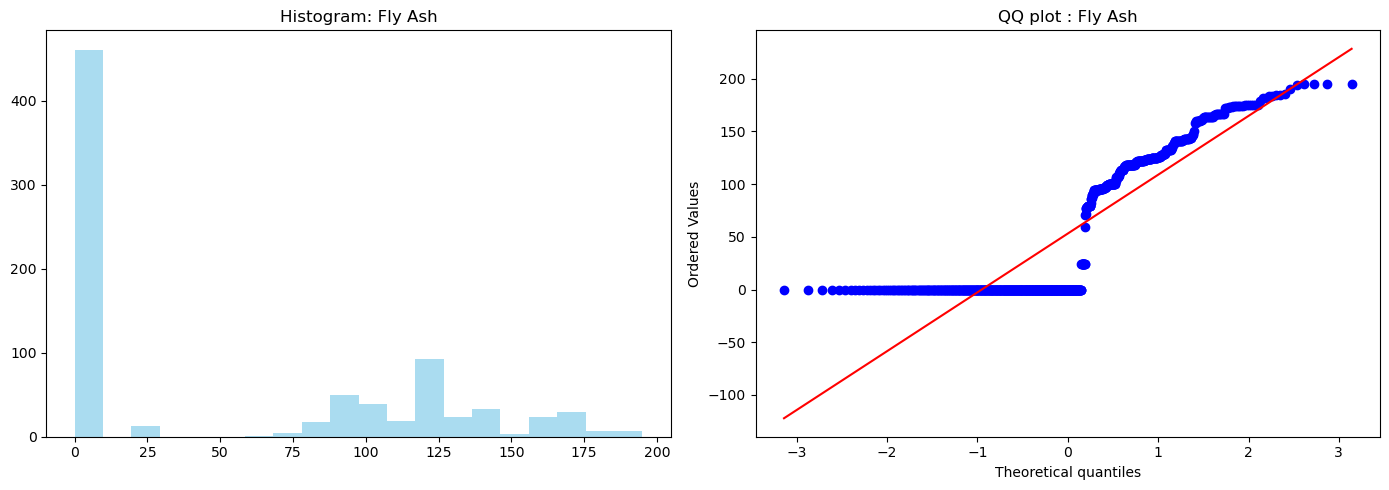

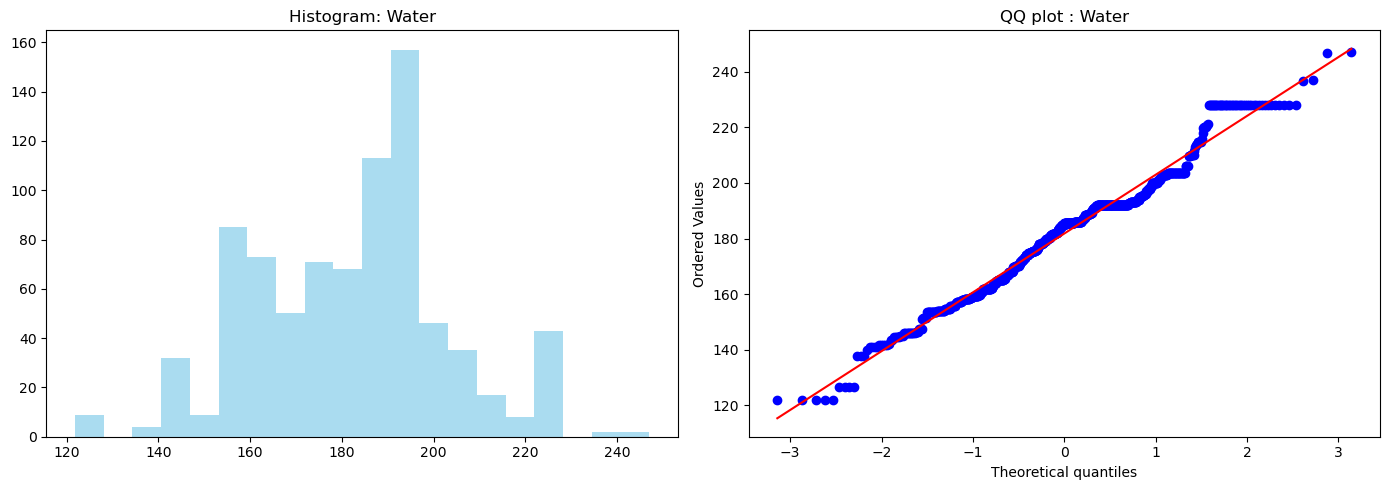

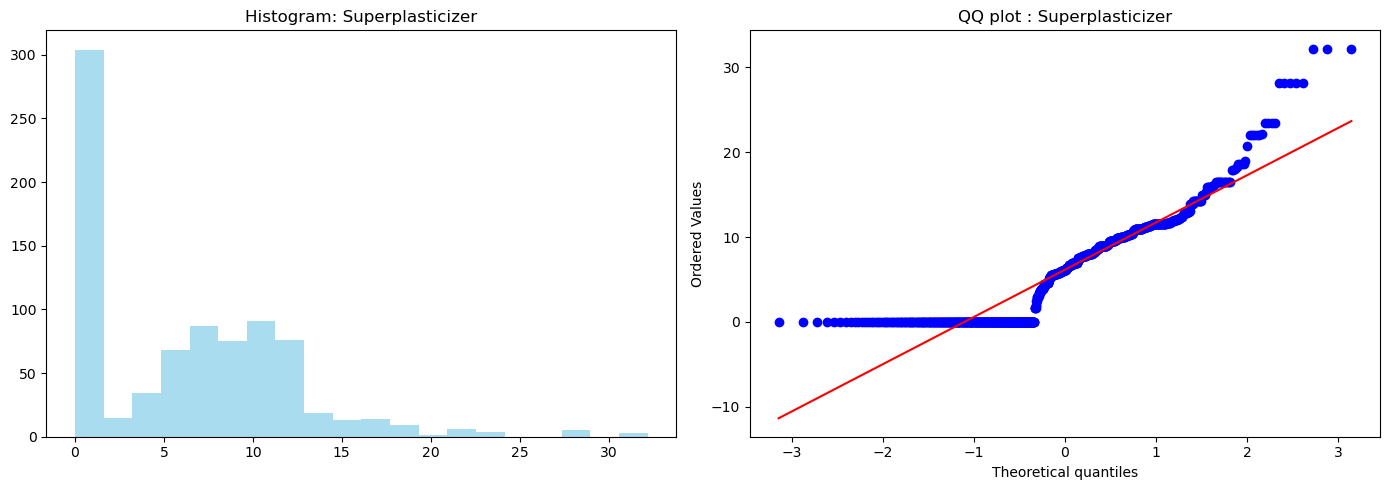

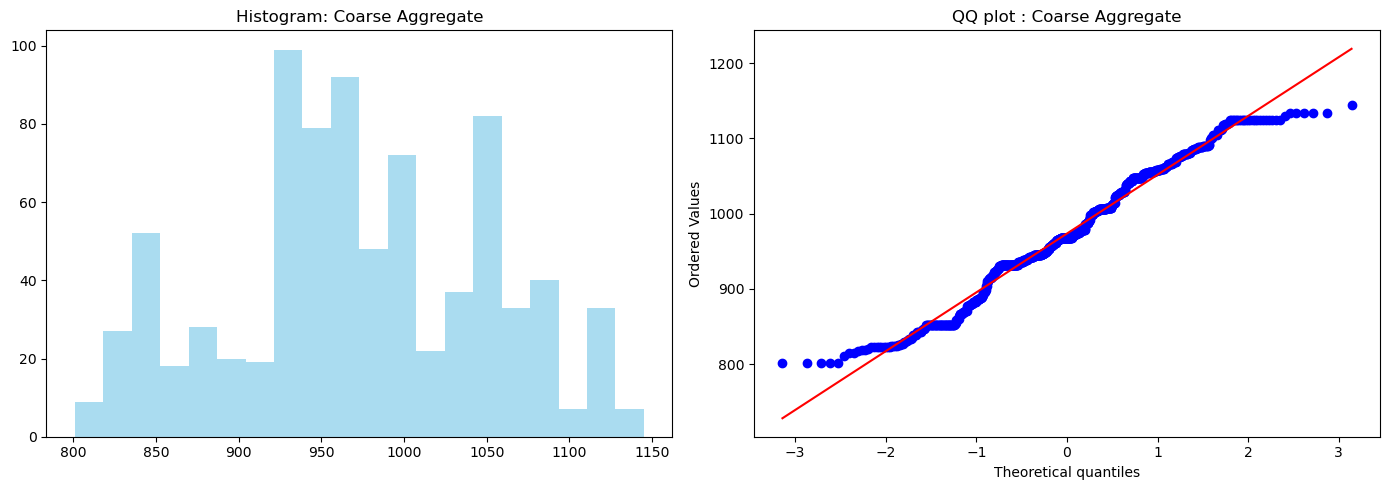

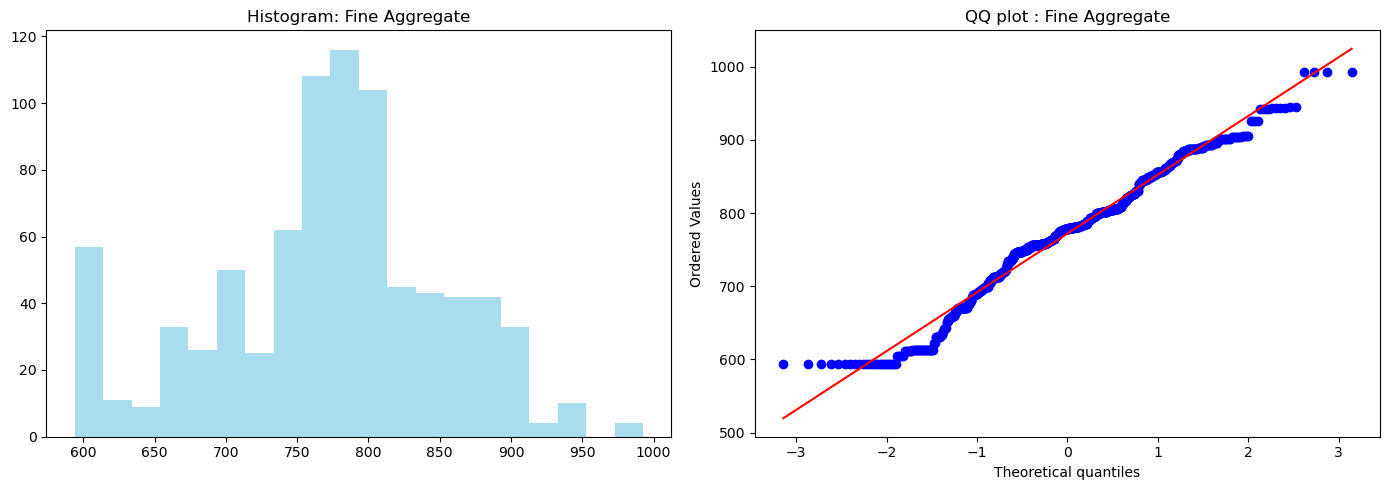

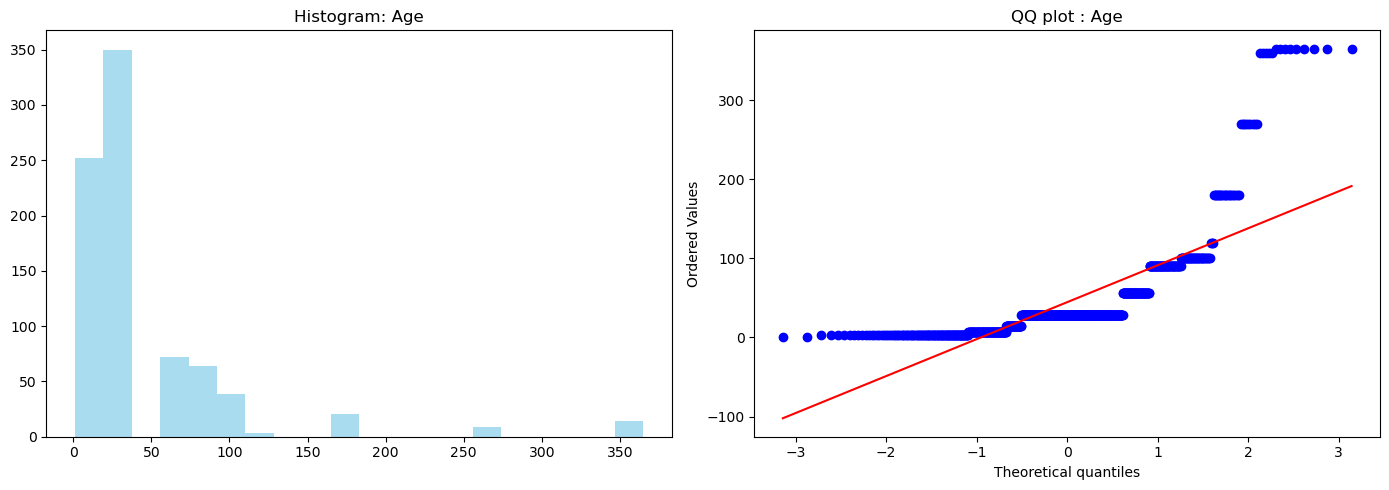

In [8]:
#plotting the histograms and QQ plots side by side for each column

for col in x_train.columns:
    fig, axes = plt.subplots(1,2, figsize=(14,5))
    
    #histogram
    axes[0].hist(x_train[col], bins=20, color='skyblue',alpha=0.7)
    axes[0].set_title(f'Histogram: {col}')
    
    
    
    #QQ plot
    stats.probplot(x_train[col], dist='norm', plot=axes[1])
    axes[1].set_title(f'QQ plot : {col}')
    
    plt.tight_layout()
    
    plt.show()
    
    

# With out powertransformation 

In [9]:
#applying Regression without any transformation

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

0.627553179231485

# applying Box-Cox Transformation

In [10]:
pt = PowerTransformer(method = 'box-cox')
x_train_transformed = pt.fit_transform(x_train+0.00001)
x_test_transformed = pt.transform(x_test+0.00001)

In [12]:
#applying linera regression on transformed data 
lr = LinearRegression()
lr.fit(x_train_transformed, y_train)
y_pred = lr.predict(x_test_transformed)
r2_score(y_test,y_pred)

0.8054599366254888

# Apply Yeo-johnson transform and linear regression

In [17]:
pt1 = PowerTransformer()
x_train_transformed2 = pt1.fit_transform(x_train)
x_test_transformed2 = pt1.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_transformed2,y_train)
y_pred = lr.predict(x_test_transformed2)
r2_score(y_test,y_pred)

0.8161906484264829